# Download Thu Vien 

In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Tao duong dan file CSV

In [4]:
path = r'C:\Users\datng\Downloads\Project Python\1. Project Sales Product\Raw Data'
dataframe = pd.read_csv(path + '\sales2019_1.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Gop va lap tat ca cac file bao cao Sales

In [5]:
frames = []
for file in os.listdir(path):
     if file.endswith('.csv'):
            filepath = os.path.join(path, file)
            df = pd.read_csv(filepath)
            frames.append(df)
            result = pd.concat(frames)
#In ra KQ
df = result.to_csv('AnnualSales2019.csv', index=False)

# Xu Ly Du Lieu

In [15]:
cdf = pd.read_csv('AnnualSales2019.csv').copy()

In [16]:
cdf.shape

(186850, 6)

In [17]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [18]:
cdf.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [19]:
cdf = cdf.dropna(how = 'all')
cdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [20]:
#Trích dữ liệu thành tháng từ bảng cột OrderDate
cdf['Month'] = cdf['Order Date'].str[0:2]
#Loại bỏ dữ liệu ngoại lai trong bảng Month
cdf = cdf[cdf['Month'] != 'Or']

In [22]:
#Chuyển đổi dữ liệu cột Price thành kiểu Float, Quantity thành kiểu Int
cdf['Price Each'] = pd.to_numeric(cdf['Price Each'], downcast= 'float')
cdf['Quantity Ordered'] = pd.to_numeric(cdf['Quantity Ordered'] , downcast='integer')

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\1532036807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Price Each'] = pd.to_numeric(cdf['Price Each'], downcast= 'float')
C:\Users\datng\AppData\Local\Temp\ipykernel_19616\1532036807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Quantity Ordered'] = pd.to_numeric(cdf['Quantity Ordered'] , downcast='integer')


In [23]:
#Tạo bảng Sales --> từ cột Price * Quantity
cdf['Sales'] = cdf['Price Each'] * cdf['Quantity Ordered']

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\3885759817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Sales'] = cdf['Price Each'] * cdf['Quantity Ordered']


In [24]:
cdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


In [25]:
cols = list(cdf.columns)
cols.insert(4, cols.pop(cols.index('Sales')))
cdf = cdf[cols]

In [26]:
cdf

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [27]:
sale_values = cdf.groupby('Month')['Sales'].sum()
sale_values.max()

4613443.5

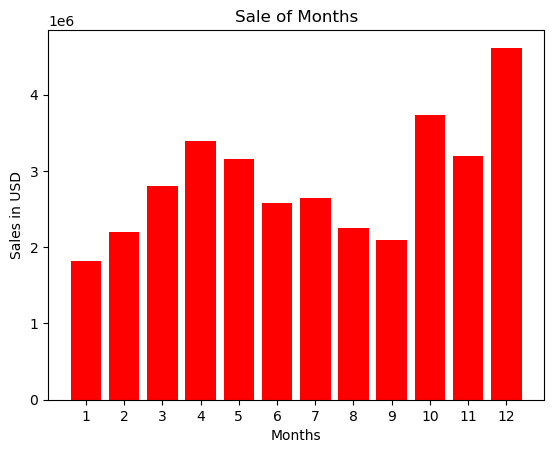

In [28]:
months = range(1,13)
plt.bar(x=months, height=sale_values, color = 'red')
plt.title('Sale of Months')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

# Task 2: What City has the best Sales?

In [29]:
cdf 

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [30]:
sample_city = '216 Dogwood St, San Francisco, CA 94016'
sample_city.split(',')[1].strip()

'San Francisco'

In [31]:
address_split_city = lambda address:address.split(',')[1].strip()
print(address_split_city)

<function <lambda> at 0x0000016965C89760>


In [32]:
cdf['City'] = cdf['Purchase Address'].apply(address_split_city)

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\1669344943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['City'] = cdf['Purchase Address'].apply(address_split_city)


In [33]:
sale_city_values = cdf.groupby('City')['Sales'].sum()
sale_city_values #--> San Francisco là thành phố có lượng Sales lớn nhất

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [34]:
cities = []
for city, sales in sale_city_values.items():
    cities.append(city)

# Print the list of cities
print(cities)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


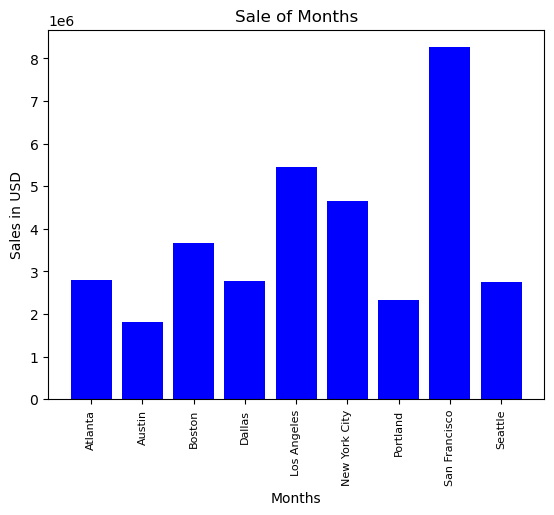

In [35]:
months = range(1,13)
plt.bar(x=cities, height=sale_city_values, color = 'blue')
plt.title('Sale of Months')
plt.xticks(cities, rotation = 90, size = 8 )
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

# Task 3.1 : What product sold the most? Why do you think it sold the most?

==>  Tháng 12 đạt doanh thu cao nhất so với những tháng còn lại.



Một vài giả thuyết cho câu hỏi tại sao tháng 12 có doanh thu cao nhất:

.Liệu có phải doanh thu tăng là cao nhất là do các dịp lễ lớn như Giáng Sinh, Tết Nguyên Đán, Black Friday,...

.Hay Sản phẩm mới được ra mắt

# Task 3.2: What city has the best sales?

San Francisco là thành phố có doanh thu đạt cao nhất.

Một vài giả thuyết cho câu hỏi tại sao San Francisco có doanh thu cao nhất:

Liệu chăng tại đây có nhiều kỹ sư công nghệ hơn so với các nơi khác nên việc sở thích đồ công nghệ tăng cao.

Liệu chăng tại Sillicon Valley tọa lạc tại đây, nên việc các công ty công nghệ tập trung mua hàng nhiều.

# Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product:

In [36]:
cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\1781981696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])


In [37]:
print(cdf['Order Date'].dtypes)

datetime64[ns]


In [38]:
cdf['Hours'] = cdf['Order Date'].dt.hour

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\504186478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Hours'] = cdf['Order Date'].dt.hour


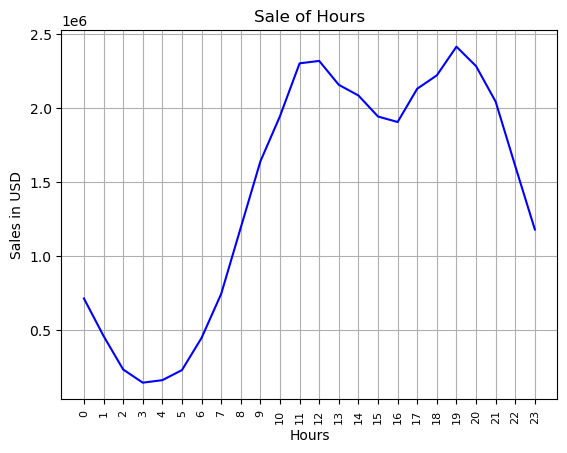

In [39]:
import matplotlib.pyplot as plt

# Grouping sales by hours and summing them up
sale_value_hours = cdf.groupby('Hours')['Sales'].sum()

# Extracting the hours for the x-axis
hours = [hour for hour, sales in sale_value_hours.items()]

# Creating the bar plot with hours on x-axis and sales values on y-axis
plt.plot(hours, sale_value_hours, color='blue')

# Adding title and labels
plt.title('Sale of Hours')
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')

# Display the plot
plt.show()

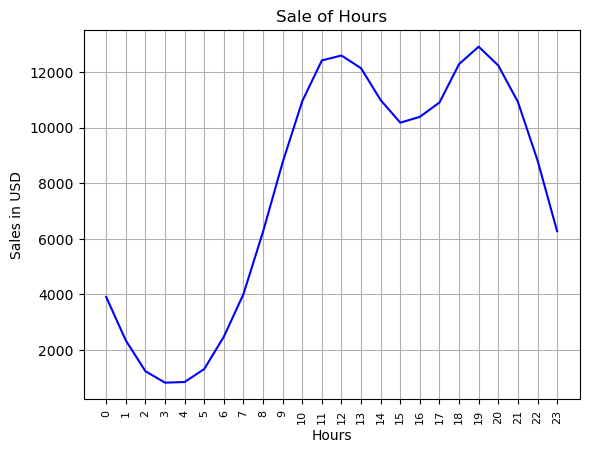

In [40]:
import matplotlib.pyplot as plt

# Grouping sales by hours and summing them up
sale_value_hours = cdf.groupby('Hours')['Sales'].count()

# Extracting the hours for the x-axis
hours = [hour for hour, sales in sale_value_hours.items()]

# Creating the bar plot with hours on x-axis and sales values on y-axis
plt.plot(hours, sale_value_hours, color='blue')

# Adding title and labels
plt.title('Sale of Hours')
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')

# Display the plot
plt.show()

Theo quan sát ta có thể thấy được, khung giờ cao nhất của mỗi đơn hàng nằm ở vị trí từ 11h AM và 19h PM

--> Ta có thể kết luận như sau, khung giờ chạy quảng cáo nên được chạy trước 2 khung giờ trên tầm trước 30p hoặc 1h tức (10h or 

10h30 AM), và (18h or 18h30 PM)

--> Đồng thời để tối ưu hóa việc chạy quảng cáo hiệu quả, ta cũng nên xem xét cho từng khu vực thành phố với mỗi khu vực thành 

phố khá nhau. Bởi vì, mỗi thành phố tương ứng với các khung giờ khác nhau.

# Task 3.4 What product are most ofthen sold together?

In [41]:
cdf

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
186846,259354,iPhone,1,700.000000,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
186847,259355,iPhone,1,700.000000,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


In [42]:
product_values_sale = cdf.groupby('Product')['Sales'].sum()
product_values_sale

Product
20in Monitor                  4.541487e+05
27in 4K Gaming Monitor        2.435098e+06
27in FHD Monitor              1.132424e+06
34in Ultrawide Monitor        2.355558e+06
AA Batteries (4-pack)         1.061184e+05
AAA Batteries (4-pack)        9.274083e+04
Apple Airpods Headphones      2.349150e+06
Bose SoundSport Headphones    1.345565e+06
Flatscreen TV                 1.445700e+06
Google Phone                  3.319200e+06
LG Dryer                      3.876000e+05
LG Washing Machine            3.996000e+05
Lightning Charging Cable      3.470942e+05
Macbook Pro Laptop            8.037600e+06
ThinkPad Laptop               4.129959e+06
USB-C Charging Cable          2.865012e+05
Vareebadd Phone               8.272000e+05
Wired Headphones              2.464784e+05
iPhone                        4.794300e+06
Name: Sales, dtype: float32

In [60]:
df_dupl = cdf[cdf['Order ID'].duplicated(keep=False)].copy()
df_dupl.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [55]:
groupbyProduct = lambda product: ', '.join(product)

In [61]:
df_dupl['All Products'] = df_dupl.groupby('Order ID')['Product'].transform(groupbyProduct)
df_dupl.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [63]:
df_dupl = df_dupl[['Order ID', 'All Products']].drop_duplicates()
df_dupl

,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [65]:
df_dupl['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

# Task 3.5: What product sold the most? Why do you think it sold the most?

In [70]:
cdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [71]:
all_product = cdf.groupby('Product')['Quantity Ordered'].sum()
all_product.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

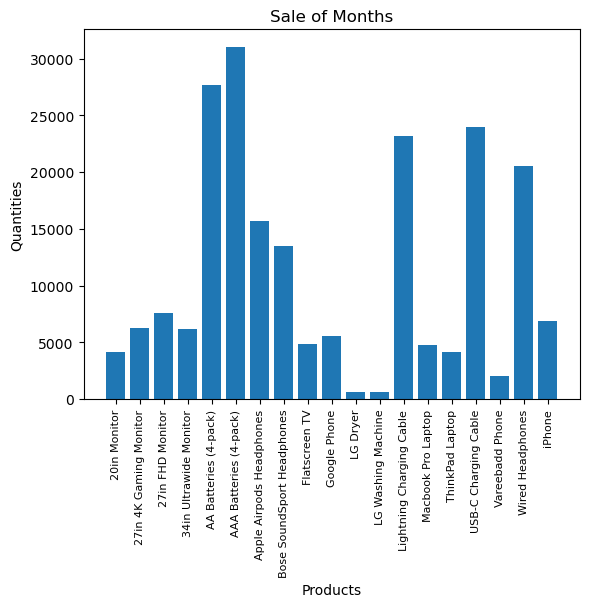

In [78]:
product_ls = [product for product, quantity in all_product.items()]
plt.bar(product_ls, all_product)
plt.title('Sale of Months')
plt.xticks(product_ls, rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Quantities')
plt.show()

Trả lời cho câu hỏi tại sao bạn nghĩ những SP này được bán nhiều nhất?

Nội dung: 
    
    .Thứ nhất: Về vấn đề giá cả
        
        Trước hết sẽ cần xác định được Giá của từng SP, SP bán chạy nhất nằm ở AA Batteries và AAA Batteries, với doanh thu Sales là cao nhất
        
        Nhưng ngược lại SP giá cao, lại có doanh thu tương đối thấp cụ thể như Apple. Và thêm vào đó, với SP từ LG lại có giá thấp hơn SP Apple nhưng doanh thu lại còn thấp hơn cả SP Apple mặc dù giá thấp hơn
       
     => Do vậy việc kết luận bị gián đoạn khi, có thể SP được bán nhiều nhất chưa thể quyết định có phải là do tên thương hiệu, hoặc chất lượng SP không. Vì còn thiếu dữ liệu về tên thương hiệu và chất lượng để chứng minh.

In [81]:
#Giá của từng SP như sau:
price_per_order = cdf.groupby('Product')['Price Each'].mean()
price_per_order.head()

Product
20in Monitor              109.989998
27in 4K Gaming Monitor    389.990021
27in FHD Monitor          149.990005
34in Ultrawide Monitor    379.990021
AA Batteries (4-pack)       3.840000
Name: Price Each, dtype: float32

C:\Users\datng\AppData\Local\Temp\ipykernel_19616\13691049.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_ls,rotation=90,size=8)


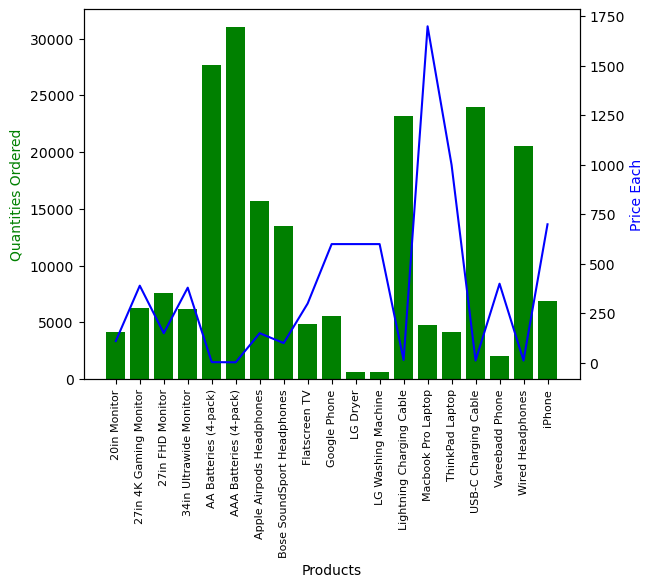

In [90]:
x = product_ls
y = all_product
z = price_per_order

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='g')
ax2.plot(x, z, 'b-')

ax1.set_xticklabels(product_ls,rotation=90,size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantities Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()